In [3]:
# check dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('originDataset.csv')

# 空值检查
null_counts = data.isnull().sum()
print(null_counts)

# 重复值检查
duplicates = data.duplicated().sum()
print(duplicates)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
0


basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None

first 5 rows:
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C204853772

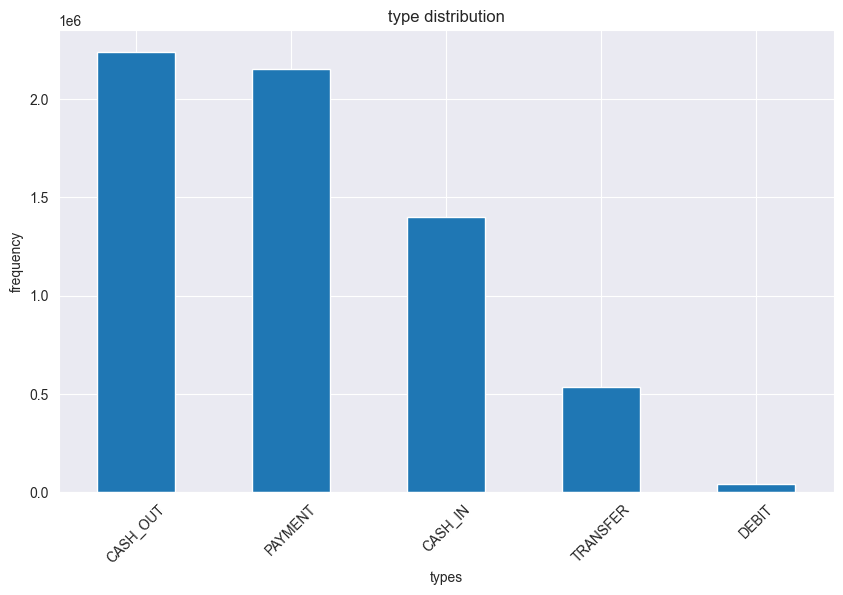


fraud rate:
isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


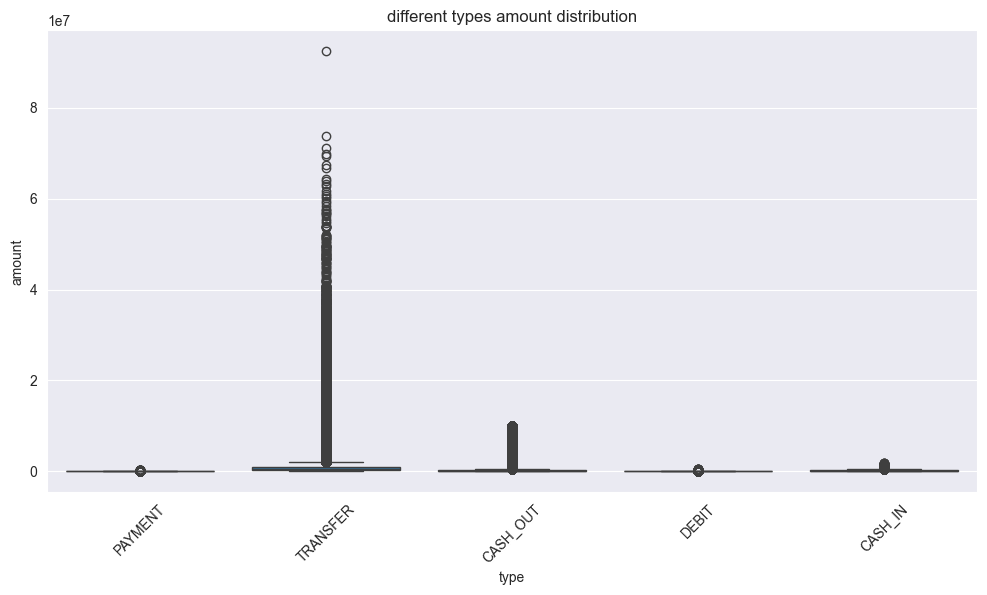

<Figure size 1000x600 with 0 Axes>

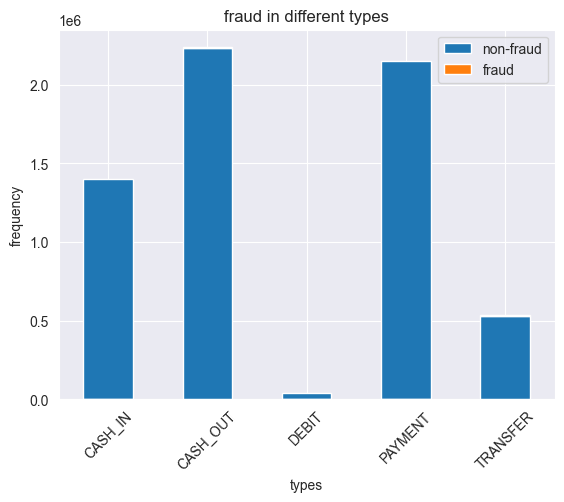


statistic info:
              count           mean           std   min          25%  \
type                                                                  
CASH_IN   1399284.0  168920.242004  1.265083e+05  0.04   70510.1825   
CASH_OUT  2237500.0  176273.964346  1.753297e+05  0.00   72669.6500   
DEBIT       41432.0    5483.665314  1.331854e+04  0.55    1500.1800   
PAYMENT   2151495.0   13057.604660  1.255645e+04  0.02    4383.8200   
TRANSFER   532909.0  910647.009645  1.879574e+06  2.60  215905.3500   

                 50%          75%          max  
type                                            
CASH_IN   143427.710  239899.0875   1915267.90  
CASH_OUT  147072.185  246539.4775  10000000.00  
DEBIT       3048.990    5479.1750    569077.51  
PAYMENT     9482.190   17561.2200    238637.98  
TRANSFER  486308.390  974958.0000  92445516.64  


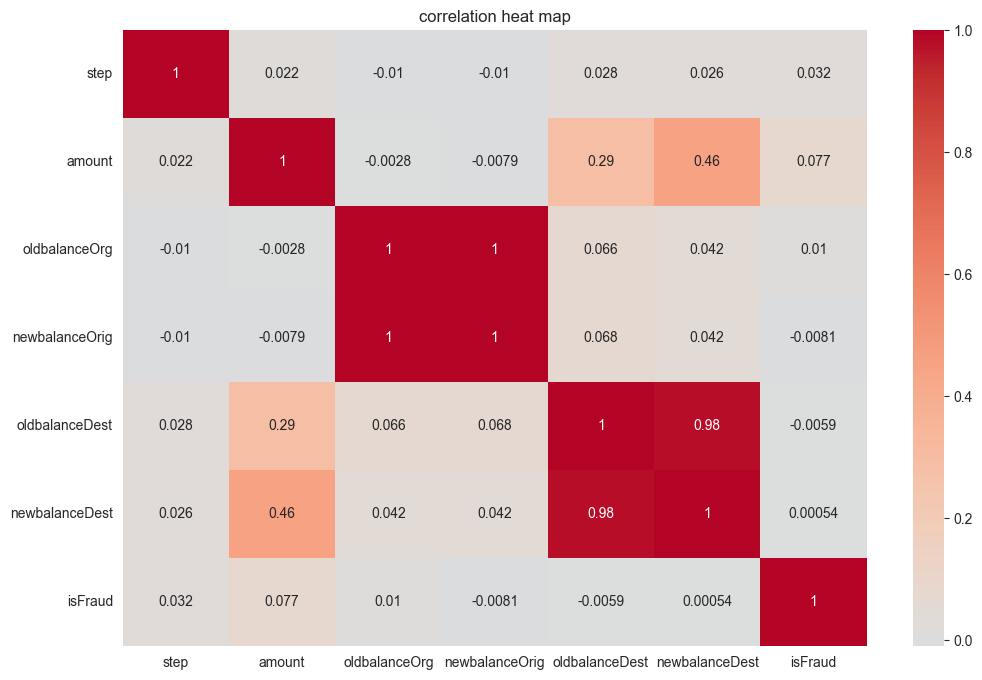

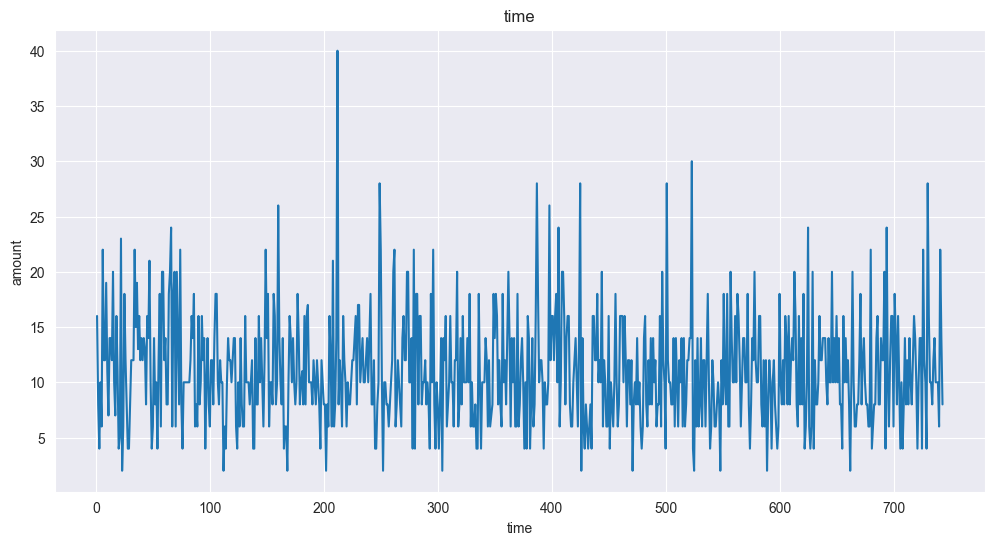

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 读取数据
df = pd.read_csv('originDataset.csv')

# 1. 基本数据信息
print("basic info:")
print(df.info())
print("\nfirst 5 rows:")
print(df.head())
print("\nbasic descriptive info:")
print(df.describe())

# 2. 交易类型分析
plt.figure(figsize=(10, 6))
df['type'].value_counts().plot(kind='bar')
plt.title('type distribution')
plt.xlabel('types')
plt.ylabel('frequency')
plt.xticks(rotation=45)
plt.show()

# 3. 欺诈交易分析
print("\nfraud rate:")
print(df['isFraud'].value_counts(normalize=True))

# 4. 金额分析
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='amount', data=df)
plt.title('different types amount distribution')
plt.xticks(rotation=45)
plt.show()

# 5. 欺诈交易与类型的关系
plt.figure(figsize=(10, 6))
fraud_by_type = pd.crosstab(df['type'], df['isFraud'])
fraud_by_type.plot(kind='bar', stacked=False)
plt.title('fraud in different types')
plt.xlabel('types')
plt.ylabel('frequency')
plt.legend(['non-fraud', 'fraud'])
plt.xticks(rotation=45)
plt.show()


# 7. 交易金额的统计特征
print("\nstatistic info:")
print(df.groupby('type')['amount'].describe())

# 8. 相关性分析
numeric_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 
                'oldbalanceDest', 'newbalanceDest', 'isFraud']
correlation = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('correlation heat map')
plt.show()

# 9. 欺诈交易的时间分布
plt.figure(figsize=(12, 6))
fraud_by_step = df[df['isFraud'] == 1]['step'].value_counts().sort_index()
plt.plot(fraud_by_step.index, fraud_by_step.values)
plt.title('time')
plt.xlabel('time')
plt.ylabel('frequency')
plt.show()

<Figure size 1200x600 with 0 Axes>

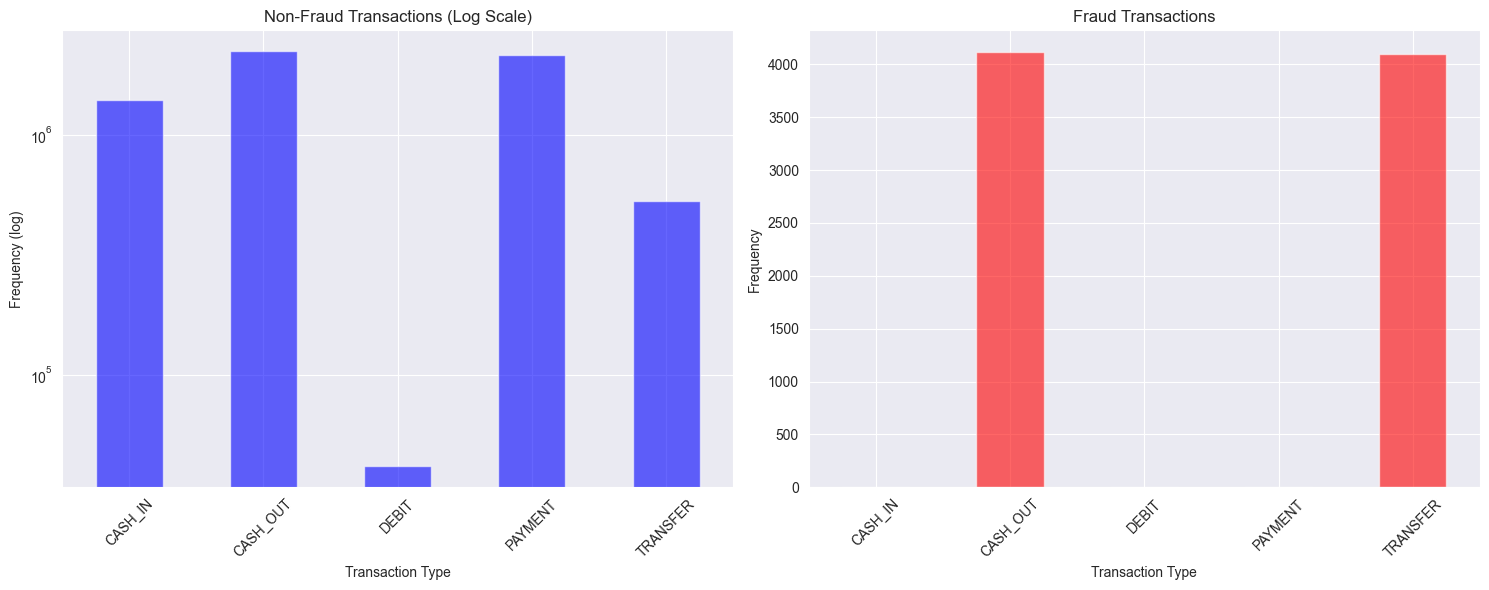


欺诈和非欺诈交易的具体数量：
type     CASH_IN  CASH_OUT  DEBIT  PAYMENT  TRANSFER
isFraud                                             
0        1399284   2233384  41432  2151495    528812
1              0      4116      0        0      4097


In [7]:
plt.figure(figsize=(12, 6))

# 创建交叉表并转置，便于分别获取欺诈和非欺诈数据
fraud_by_type = pd.crosstab(df['type'], df['isFraud']).T

# 创建两个子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 左图：非欺诈交易（使用对数刻度）
fraud_by_type.iloc[0].plot(kind='bar', ax=ax1, color='blue', alpha=0.6)
ax1.set_yscale('log')
ax1.set_title('Non-Fraud Transactions (Log Scale)')
ax1.set_xlabel('Transaction Type')
ax1.set_ylabel('Frequency (log)')
ax1.tick_params(axis='x', rotation=45)

# 右图：欺诈交易
fraud_by_type.iloc[1].plot(kind='bar', ax=ax2, color='red', alpha=0.6)
ax2.set_title('Fraud Transactions')
ax2.set_xlabel('Transaction Type')
ax2.set_ylabel('Frequency')
ax2.tick_params(axis='x', rotation=45)

# 调整布局
plt.tight_layout()
plt.show()

# 打印具体数值
print("\n欺诈和非欺诈交易的具体数量：")
print(fraud_by_type)

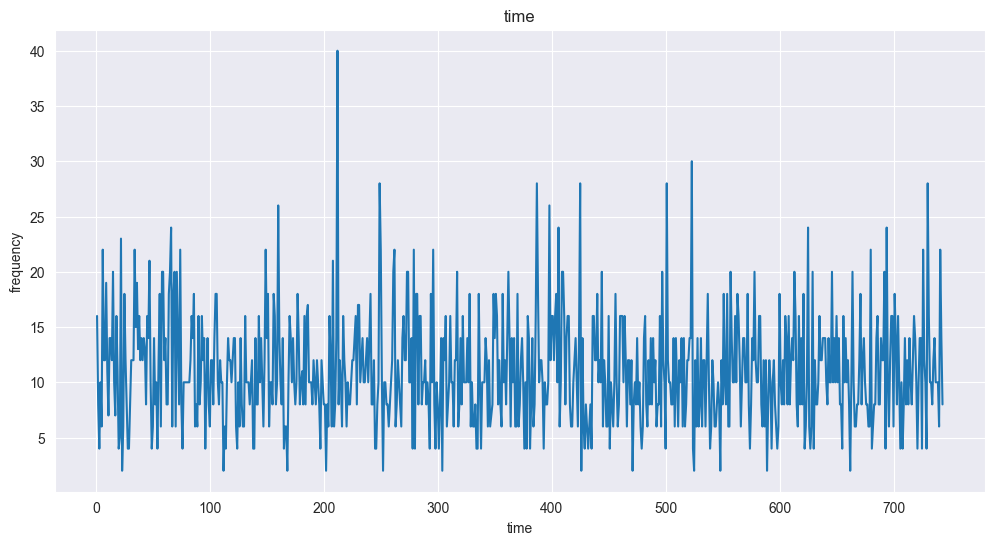

In [8]:
# 9. 欺诈交易的时间分布
plt.figure(figsize=(12, 6))
fraud_by_step = df[df['isFraud'] == 1]['step'].value_counts().sort_index()
plt.plot(fraud_by_step.index, fraud_by_step.values)
plt.title('time')
plt.xlabel('time')
plt.ylabel('frequency')
plt.show()

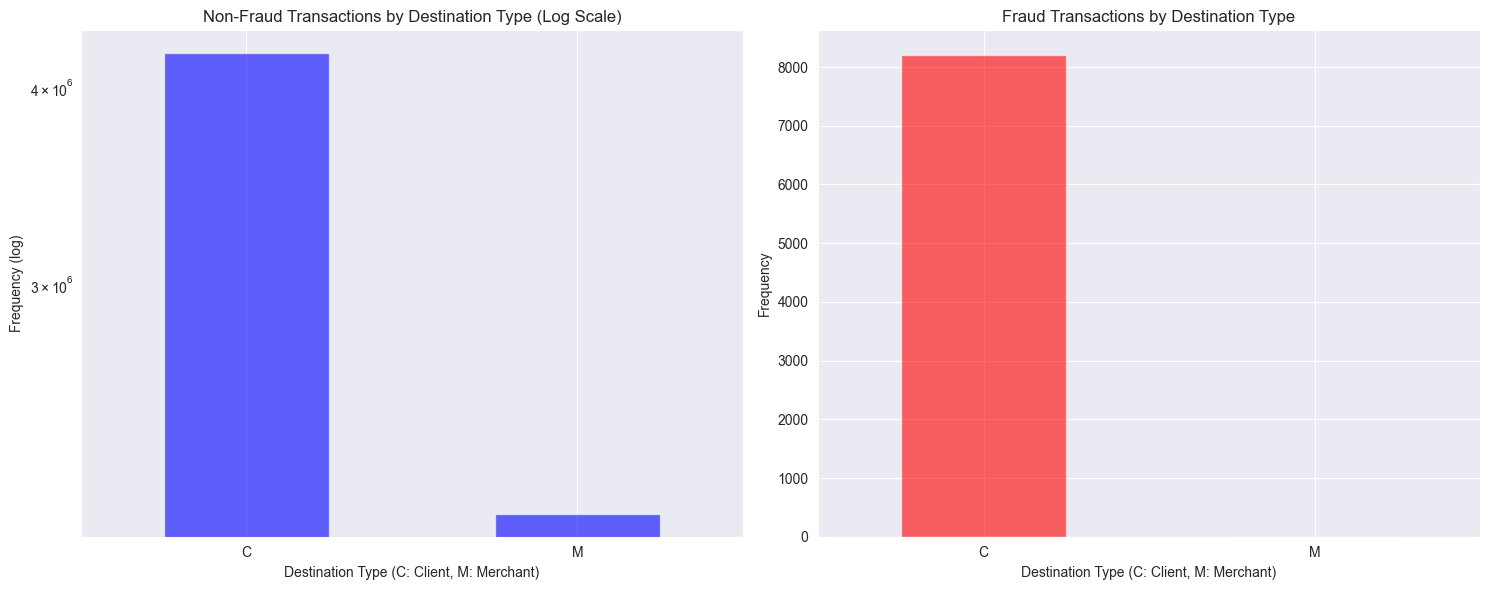


欺诈和非欺诈交易的接收者类型分布：
dest_type        C        M
isFraud                    
0          4202912  2151495
1             8213        0

各类型的欺诈率：
dest_type
C    0.195%
M      0.0%
dtype: object


In [11]:
# 提取nameDest的首字母并创建交叉表
df['dest_type'] = df['nameDest'].str[0]
dest_fraud_dist = pd.crosstab(df['dest_type'], df['isFraud']).T

# 创建两个子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 左图：非欺诈交易（使用对数刻度）
dest_fraud_dist.iloc[0].plot(kind='bar', ax=ax1, color='blue', alpha=0.6)
ax1.set_yscale('log')
ax1.set_title('Non-Fraud Transactions by Destination Type (Log Scale)')
ax1.set_xlabel('Destination Type (C: Client, M: Merchant)')
ax1.set_ylabel('Frequency (log)')
ax1.tick_params(axis='x', rotation=0)

# 右图：欺诈交易
dest_fraud_dist.iloc[1].plot(kind='bar', ax=ax2, color='red', alpha=0.6)
ax2.set_title('Fraud Transactions by Destination Type')
ax2.set_xlabel('Destination Type (C: Client, M: Merchant)')
ax2.set_ylabel('Frequency')
ax2.tick_params(axis='x', rotation=0)

# 调整布局
plt.tight_layout()
plt.show()

# 打印具体数值
print("\n欺诈和非欺诈交易的接收者类型分布：")
print(dest_fraud_dist)
print("\n各类型的欺诈率：")
fraud_rate = (dest_fraud_dist.iloc[1] / dest_fraud_dist.sum()) * 100
print(fraud_rate.round(4).astype(str) + '%')

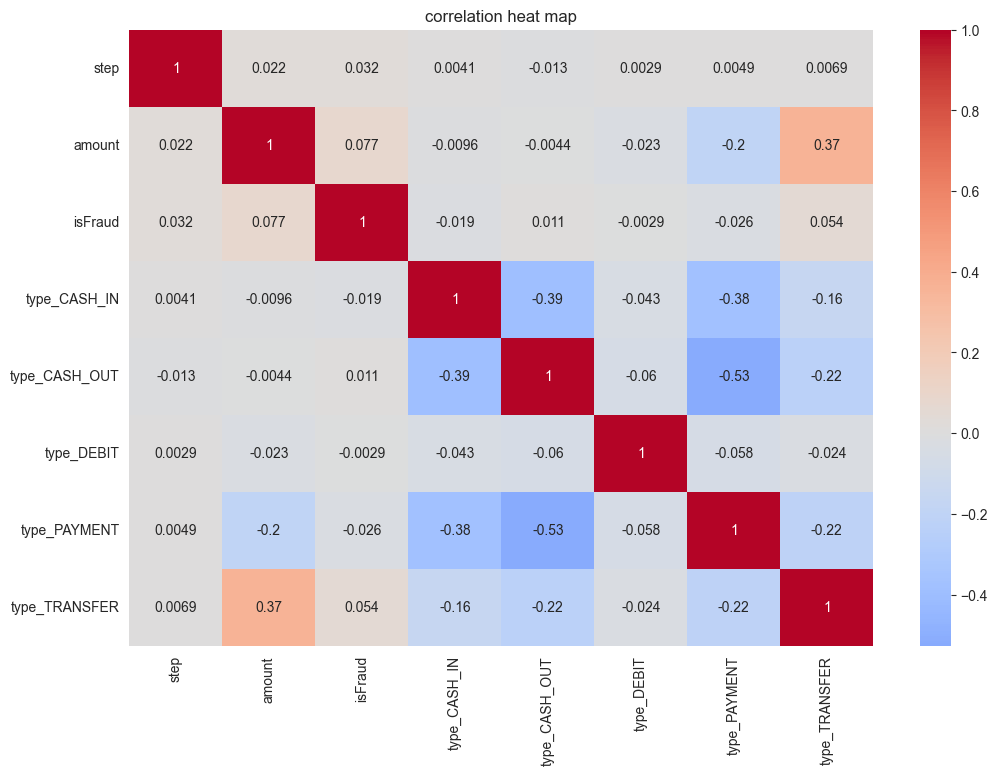

In [13]:
df = pd.read_csv('uncleaned_dataset.csv')
numeric_cols = ['step','amount','isFraud','type_CASH_IN','type_CASH_OUT','type_DEBIT','type_PAYMENT','type_TRANSFER']
correlation = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('correlation heat map')
plt.show()